In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from sklearn.metrics import mean_absolute_error

In [2]:
df = pd.read_csv('/Users/markdetiberiis/Desktop/Stocks_data/tcs.csv')


In [3]:
df["Date"] = pd.to_datetime(df["Date"])


In [4]:
df.drop(['Date.1'],axis =1,inplace = True)

In [5]:
df

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2015-01-01,ZEEL,EQ,380.75,381.0,381.05,377.05,379.00,377.70,378.33,321140,1.214976e+13,7645,93391,0.2908
1,2015-01-02,ZEEL,EQ,377.70,378.0,383.50,378.00,379.50,380.95,381.24,960337,3.661218e+13,14605,527004,0.5488
2,2015-01-05,ZEEL,EQ,380.95,379.1,381.60,377.10,379.80,380.00,379.79,842678,3.200426e+13,26590,388593,0.4611
3,2015-01-06,ZEEL,EQ,380.00,377.0,378.45,361.20,369.95,367.90,370.26,1443145,5.343422e+13,32994,756677,0.5243
4,2015-01-07,ZEEL,EQ,367.90,367.9,370.00,360.45,363.90,364.85,363.72,1527500,5.555868e+13,21579,924628,0.6053
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1432,2020-10-15,ZEEL,EQ,186.20,187.0,188.40,178.70,180.20,179.95,183.65,20008768,3.674521e+14,114935,3942133,0.1970
1433,2020-10-16,ZEEL,EQ,179.95,181.5,182.95,173.50,175.30,175.70,176.63,29518941,5.214072e+14,163941,5645280,0.1912
1434,2020-10-19,ZEEL,EQ,175.70,176.7,177.90,173.50,174.20,174.20,174.96,20656092,3.613988e+14,117018,3544485,0.1716
1435,2020-10-20,ZEEL,EQ,174.20,174.2,183.80,173.00,183.00,183.00,181.21,32494248,5.888132e+14,165495,2667824,0.0821


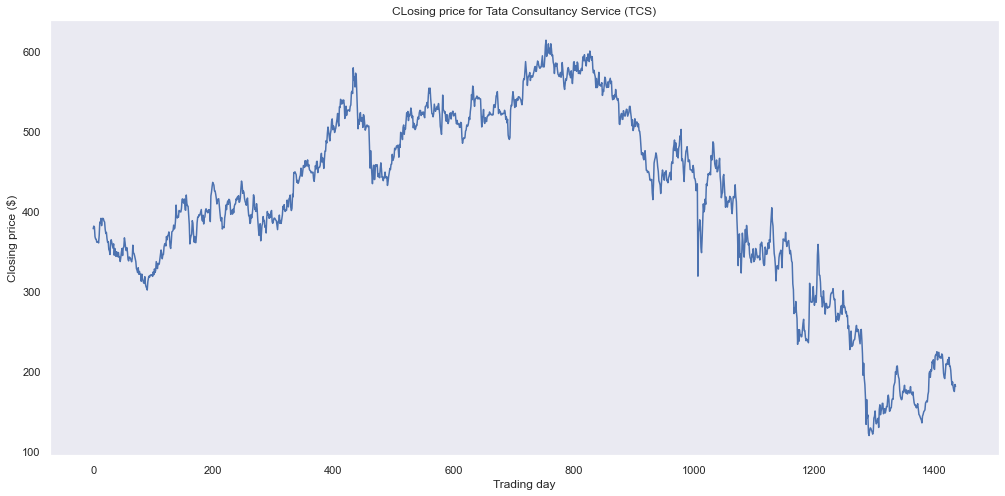

In [6]:
plt.figure(figsize=(17,8))
plt.plot(df.Close)
plt.title('CLosing price for Tata Consultancy Service (TCS)')
plt.ylabel('Closing price ($)')
plt.xlabel('Trading day')
plt.grid(False)
plt.show()

In [7]:
def plot_moving_avg(series, window, plot_intervals = False, scale = 1.96):
    rolling_mean = series.rolling(window=window).mean()
    
    plt.figure(figsize = (17,8))
    plt.title('Moving Average\n window size = {}'.format(window))
    plt.plot(rolling_mean, 'g', label = 'Rolling mean trend')
    
    if plot_intervals:
        mae = mean_absolute_error(series[window:], rolling_mean[window:])
        deviation = np.std(series[window:] - rolling_mean[window:])
        lower_bound = rolling_mean - (mae + scale * deviation)
        upper_bound = rolling_mean + (mae + scale * deviation)
        plt.plot(upper_bound, 'r--', label = 'Upper bound / Lower bound')
        plt.plot(lower_bound, 'r--')
        
    plt.plot(series[window:], label = 'Actual values')
    plt.legend(loc = 'Best')
    plt.grid(True)

<ipython-input-7-2c784449e407>:17: MatplotlibDeprecationWarning: Unrecognized location 'Best'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  plt.legend(loc = 'Best')


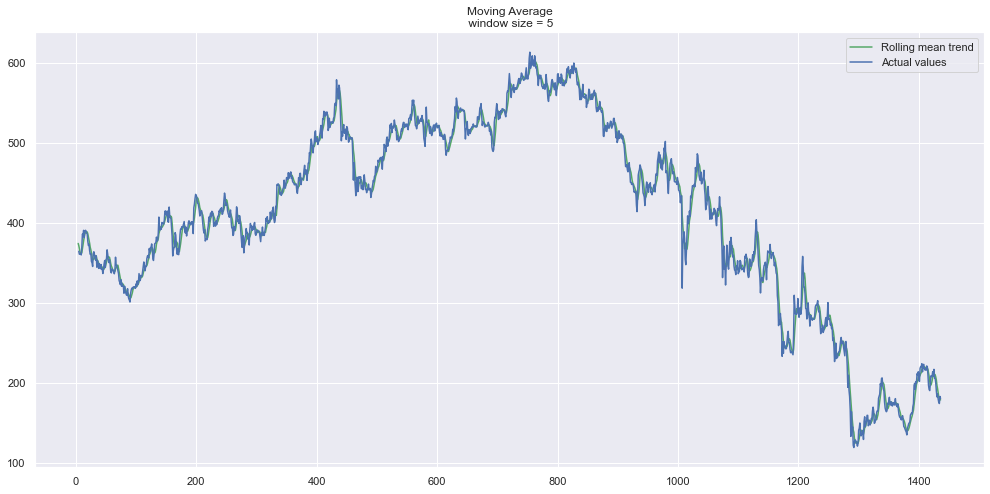

In [8]:
#Smooth by previous 5 days 

plot_moving_avg(df.Close,5)

<ipython-input-7-2c784449e407>:17: MatplotlibDeprecationWarning: Unrecognized location 'Best'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  plt.legend(loc = 'Best')


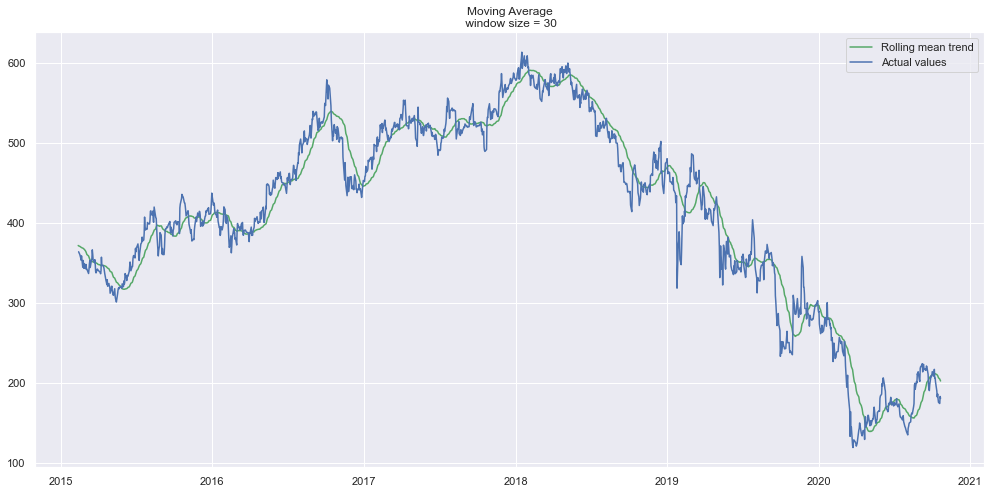

In [27]:
#Smooth by previous 30 days 

plot_moving_avg(df.Close,30)

<ipython-input-7-2c784449e407>:17: MatplotlibDeprecationWarning: Unrecognized location 'Best'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  plt.legend(loc = 'Best')


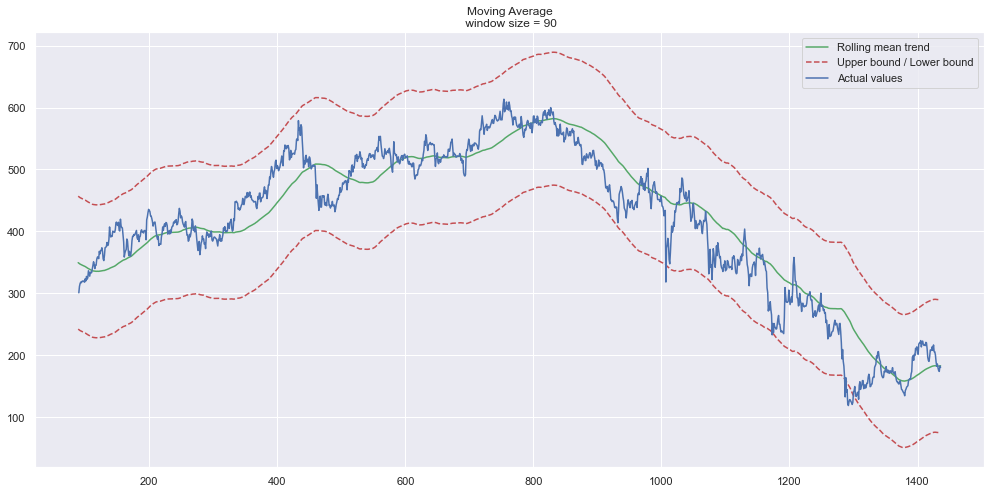

In [10]:
#Smooth by previous 90 days (1/4)

plot_moving_avg(df.Close,90,plot_intervals = True)


In [11]:
def plot_time_series(stock, weeks = [4, 16, 28, 40, 52]):    
    dummy = pd.DataFrame()
    
    # resampling into weeks format to calculate for weeks
    dummy['Close'] = stock['Close'].resample('W').mean() 
     
    for i in range(len(weeks)):
        m_a = dummy['Close'].rolling(weeks[i]).mean() # M.A using inbuilt function
        dummy[" Mov.AVG for " + str(weeks[i])+ " Weeks"] = m_a
        print('Calculated Moving Averages: for {0} weeks: \n\n {1}' .format(weeks[i], dummy['Close']))
    dummy.plot(title="Moving Averages for {} \n\n" .format(stock.Symbol))
    

In [12]:
#df.drop(['Symbol','Series'],axis=1,inplace=True)

In [13]:
df["Date"] = pd.to_datetime(df["Date"])


In [14]:
df.set_index(['Date'],inplace=True)

Calculated Moving Averages: for 4 weeks: 

 Date
2015-01-04    379.3250
2015-01-11    367.6100
2015-01-18    367.5700
2015-01-25    387.4200
2015-02-01    385.0125
                ...   
2020-09-27    197.6300
2020-10-04    209.8625
2020-10-11    207.5000
2020-10-18    182.8300
2020-10-25    179.2500
Freq: W-SUN, Name: Close, Length: 304, dtype: float64
Calculated Moving Averages: for 16 weeks: 

 Date
2015-01-04    379.3250
2015-01-11    367.6100
2015-01-18    367.5700
2015-01-25    387.4200
2015-02-01    385.0125
                ...   
2020-09-27    197.6300
2020-10-04    209.8625
2020-10-11    207.5000
2020-10-18    182.8300
2020-10-25    179.2500
Freq: W-SUN, Name: Close, Length: 304, dtype: float64
Calculated Moving Averages: for 28 weeks: 

 Date
2015-01-04    379.3250
2015-01-11    367.6100
2015-01-18    367.5700
2015-01-25    387.4200
2015-02-01    385.0125
                ...   
2020-09-27    197.6300
2020-10-04    209.8625
2020-10-11    207.5000
2020-10-18    182.8300
2020-10

<Figure size 864x504 with 0 Axes>

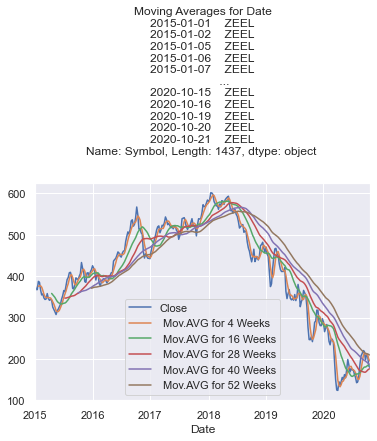

In [25]:
plt.figure(figsize=(12,7))
plot_time_series(df)

In [20]:
df['Date'] = df.index

Visualizing the training data 

ConversionError: Failed to convert value(s) to axis units: <built-in function arange>

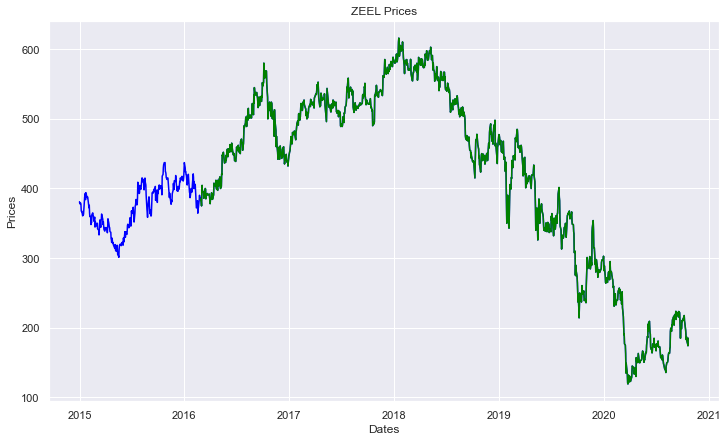

In [28]:
train_data, test_data = df[0:int(len(df)*0.8)], df[int(len(df)*0.2):]
plt.figure(figsize=(12,7))
plt.title('ZEEL Prices')
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.plot(df['Open'], 'blue', label='Training Data')
plt.plot(test_data['Open'], 'green', label='Testing Data')
plt.xticks(np.arange, df['Date'])
plt.legend()